# Problem Set 3

# Question 1

In [1]:
import pandas as pd
import numpy as np

In [7]:
file_path = '../Datasets/occupations.csv'
users_df = pd.read_csv(file_path, delimiter = '|')

In [9]:
users_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
# Mean Age per occupation
mean_age = users_df.groupby('occupation')['age'].mean()
print(mean_age)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [19]:
# Male ratio per occupation

users_df['is_male'] = (users_df['gender'] == 'M')
male_ratio = users_df.groupby('occupation')['is_male'].mean()

male_ratio = male_ratio.sort_values(ascending=False)
print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: is_male, dtype: float64


In [31]:
# Max and min age for every occupation

age_by_stats = users_df.groupby('occupation')['age'].agg(['min','max'])
print(age_by_stats)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [32]:
# Mean age for each occupation and sex

mean_occ_sex = users_df.groupby(['occupation', 'gender'])['age'].mean()
res_table = mean_occ_sex.unstack()

print(res_table)

gender                 F          M
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154


In [45]:
# Percentage of men and women


gender_pct = users_df.groupby(['occupation', 'gender']).size().unstack()

gender_pct = (gender_pct.div(gender_pct.sum(axis=1), axis=0) * 100).round(2)
print(gender_pct)

gender             F       M
occupation                  
administrator  45.57   54.43
artist         46.43   53.57
doctor           NaN  100.00
educator       27.37   72.63
engineer        2.99   97.01
entertainment  11.11   88.89
executive       9.38   90.62
healthcare     68.75   31.25
homemaker      85.71   14.29
lawyer         16.67   83.33
librarian      56.86   43.14
marketing      38.46   61.54
none           44.44   55.56
other          34.29   65.71
programmer      9.09   90.91
retired         7.14   92.86
salesman       25.00   75.00
scientist       9.68   90.32
student        30.61   69.39
technician      3.70   96.30
writer         42.22   57.78


# Question 2

In [46]:
euro_file = '../Datasets/euro.csv'
euro12 = pd.read_csv(euro_file)

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [49]:
# Select only goal column

goal = euro12['Goals']
print(goal)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [59]:
# How many teams participated?

total_teams = euro12['Team'].unique()
count_teams = euro12['Team'].nunique()

print(total_teams)
print()
print(count_teams, ' teams participated in total.')

['Croatia' 'Czech Republic' 'Denmark' 'England' 'France' 'Germany'
 'Greece' 'Italy' 'Netherlands' 'Poland' 'Portugal' 'Republic of Ireland'
 'Russia' 'Spain' 'Sweden' 'Ukraine']

16  teams participated in total.


In [61]:
# Total columns
tot_columns = len(euro12.columns)

print(f"There are total of {tot_columns} columns.")

There are total of 35 columns.


In [72]:
# View only the columns Team, Yellow Cards and Red Cards and assign themto a dataframe called discipline

discipline = euro12[['Team','Yellow Cards', 'Red Cards']]
discipline.head(20)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [74]:
# Sort by Red Cards, then to Yellow Cards

sort_cols = discipline.sort_values(by=['Red Cards','Yellow Cards'])

sort_cols.head(16)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [76]:
# Calculate mean per Yellow cards given to teams

mean_yellow = euro12.groupby('Team')['Yellow Cards'].mean()

print(mean_yellow)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [83]:
# Filter teams that scored more than 6 goals

filter_goals = euro12[euro12['Goals']>6]
filter_goals.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [84]:
# Select teams that starts with letter G

filter_teams = euro12[euro12['Team'].str.startswith('G')]

filter_teams.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [92]:
# Select all rows except last 3

sel_cols = euro12.iloc[:-3]

sel_cols.head(20)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [94]:
# Present only the Shooting Accuracy from England, Italy and Russia

shoot_df = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]
shooting_accuracy_selected_teams = shoot_df[['Team', 'Shooting Accuracy']]


shooting_accuracy_selected_teams.head(20)

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [2]:
series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [4]:
housing_df = pd.concat([series_1,series_2,series_3],axis=1)
housing_df.head()

,0,1,2
0,2,1,16299
1,2,2,10028
2,2,1,29317
3,4,3,10764
4,2,3,26160


In [6]:
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housing_df.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,16299
1,2,2,10028
2,2,1,29317
3,4,3,10764
4,2,3,26160


In [10]:
bigcolumn = pd.DataFrame(pd.concat([series_1,series_2,series_3]))
print(bigcolumn)

        0
0       2
1       2
2       2
3       4
4       2
..    ...
95  16109
96  23626
97  17792
98  16862
99  20803

[300 rows x 1 columns]


In [9]:
bigcolumn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       300 non-null    int32
dtypes: int32(1)
memory usage: 3.5 KB


In [12]:
print(f"Does the bigcolumn goes beyond index 99? {bigcolumn.index.max() == 99}")

Does the bigcolumn goes beyond index 99? True


In [13]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.head(300)

,0
0,2
1,2
2,2
3,4
4,2
...,...
295,16109
296,23626
297,17792
298,16862


# Question 4

In [30]:
file_path = '../Datasets/wind.txt'

def fix_year(year):
    #assuming year 2061 was 1961
    if year.year == 2061:
        return year.replace(year=1961)
    else:
        return year

#writing the data to df
wind_df = pd.read_table(file_path, sep='\s+', parse_dates={'date': ['Yr', 'Mo', 'Dy']}, na_values='NaN')

wind_df['date'] = wind_df['date'].apply(fix_year)
wind_df.set_index('date', inplace=True)

print(wind_df.head())
wind_df.head(20)
  

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-09,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37


In [31]:
#converting date time to index (even though the date is already set as index)

wind_df.index = pd.to_datetime(wind_df.index)

wind_df.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [9]:
#missing and non-missing values

In [32]:
missing_values_per_location = wind_df.isnull().sum()

print(f"Number of missing values for each location: {missing_values_per_location}")

total_non_missing_values = wind_df.count().sum()

print("\nTotal number of non-missing values:", total_non_missing_values)

Number of missing values for each location: RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total number of non-missing values: 78857


In [33]:
mean_windspeed = wind_df.mean().mean()

print("Mean windspeed over all locations and times:", mean_windspeed)

Mean windspeed over all locations and times: 10.227982360836938


In [34]:
#Location stats
loc_stats = pd.DataFrame({
    'min': wind_df.min(),
    'max': wind_df.max(),
    'mean': wind_df.mean(),
    'std': wind_df.std()
})

#stats on different locations
print("Location wise statistics for windspeeds:")
print(loc_stats)

Location wise statistics for windspeeds:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [35]:
#Location and day wise stats

day_stats = pd.DataFrame({
    'min': wind_df.min(axis=1),
    'max': wind_df.max(axis=1),
    'mean': wind_df.mean(axis=1),
    'std': wind_df.std(axis=1)
})

print("Day-wise statistics for windspeeds:")
print(day_stats)

Day-wise statistics for windspeeds:
             min    max       mean       std
date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [36]:
#Average windspeed

january_data = wind_df[wind_df.index.month == 1]

average_windspeed_january = january_data.mean()

print("Average windspeed in January for each location:")
print(average_windspeed_january)

Average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [37]:
# Downsample to yearly,monthly,and weekly frequency
yearly_data = wind_df.resample('Y').mean()

monthly_data = wind_df.resample('M').mean()

weekly_data = wind_df.resample('W').mean()

yearly_data.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
monthly_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613


In [39]:
weekly_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000


In [40]:
#Stats for each week

weekly_data_subset = wind_df.loc['1961-01-02':'1961-12-31'].resample('W').agg(['min', 'max', 'mean', 'std'])


# Display the statistics for each week
print("Weekly Statistics for the First 52 Weeks:")
print(weekly_data_subset)

Weekly Statistics for the First 52 Weeks:
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571

# Question 5

In [83]:
file_path = '../Datasets/chipotle.txt'

#writing the data to df
chipo = pd.read_table(file_path, sep='\t', na_values='NaN')

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [84]:
#Number of observations
num_observations = len(chipo)

#Number of columns and column names
num_columns = len(chipo.columns)
column_names = chipo.columns.tolist()

print("Number of Observations:", num_observations)
print("\nNumber of Columns:", num_columns)
print("\nColumn Names:")
for col in column_names:
    print(col)

Number of Observations: 4622

Number of Columns: 5

Column Names:
order_id
quantity
item_name
choice_description
item_price


In [85]:
#Indexing information
index_info = chiptole.index
print(index_info)

#Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("\n Most-Ordered Item:", most_ordered_item)


#Quantity of the most-ordered item
quantity_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nQuantity of the Most-Ordered Item:", quantity_most_ordered_item)

RangeIndex(start=0, stop=4622, step=1)

 Most-Ordered Item: Chicken Bowl

Quantity of the Most-Ordered Item: 761


In [86]:
#Most ordered item in the choice_description column
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most Ordered Item in choice_description:")
print(most_ordered_choice)

#Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print("\nTotal Number of Items Ordered:", total_items_ordered)


Most Ordered Item in choice_description:
[Diet Coke]

Total Number of Items Ordered: 4972


In [90]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [91]:
#Step 13
#Turn the item price into a float
#check the item price type before conversion
item_price_before_type = chipo['item_price'].dtype

#removing dollar sign
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

#lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Check the item price type after conversion
item_price_after_type = chipo['item_price'].dtype

# Display the results
print("Step 13: Item Price Type Before Conversion:", item_price_before_type)
print("Step 13: Item Price Type After Conversion:", item_price_after_type)


Step 13: Item Price Type Before Conversion: object
Step 13: Item Price Type After Conversion: float64


C:\Users\Jemin\AppData\Local\Temp\ipykernel_26216\2679746979.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


In [92]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [93]:
#Calculate revenue for the period
revenue_for_period = (chipo['item_price'] * chipo['quantity']).sum()

#Calculate the number of orders made
num_orders = chipo['order_id'].nunique()

#Calculate average revenue per order
avg_revenue_per_order = revenue_for_period / num_orders

#Calculate the number of different items sold
num_different_items = chipo['item_name'].nunique()

print("Step 15: Revenue for the Period:", revenue_for_period)
print("Step 16: Number of Orders Made:", num_orders)
print("Step 17: Average Revenue per Order:", avg_revenue_per_order)
print("Step 18: Number of Different Items Sold:", num_different_items)

Step 15: Revenue for the Period: 39237.02
Step 16: Number of Orders Made: 1834
Step 17: Average Revenue per Order: 21.39423118865867
Step 18: Number of Different Items Sold: 50


# Question 6

### Create a line plot showing the number of marriages and divorces per capita in theU.S. between 1867 and 2014. Label both lines and show the legend.Don't forget to label your axes!


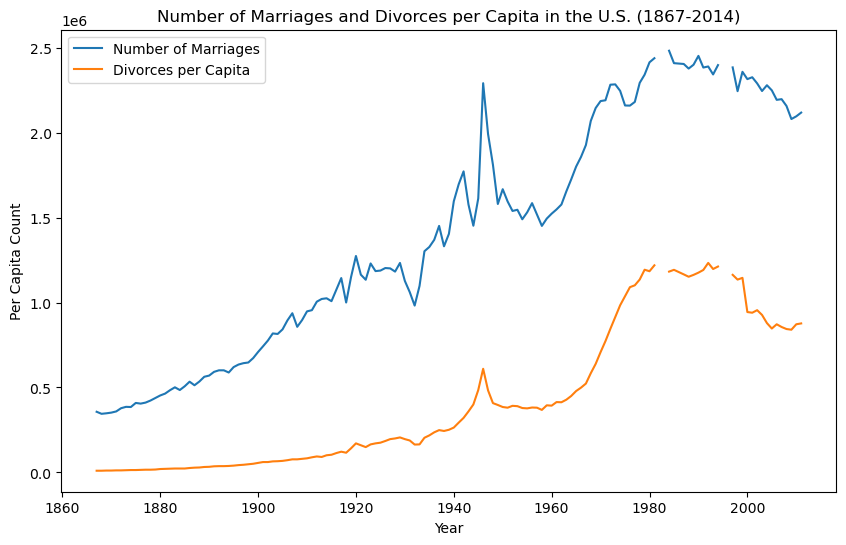

In [3]:
import matplotlib.pyplot as plt

file_path = '../Datasets/us-marriages-divorces-1867-2014.csv'
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Marriages'], label='Number of Marriages')
plt.plot(df['Year'], df['Divorces'], label='Divorces per Capita')

#adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.legend()

plt.show()


# Question 7

### Create a vertical bar chart comparing the number of marriages and divorces percapita in the U.S. between 1900, 1950, and 2000.Don't forget to label your axes!

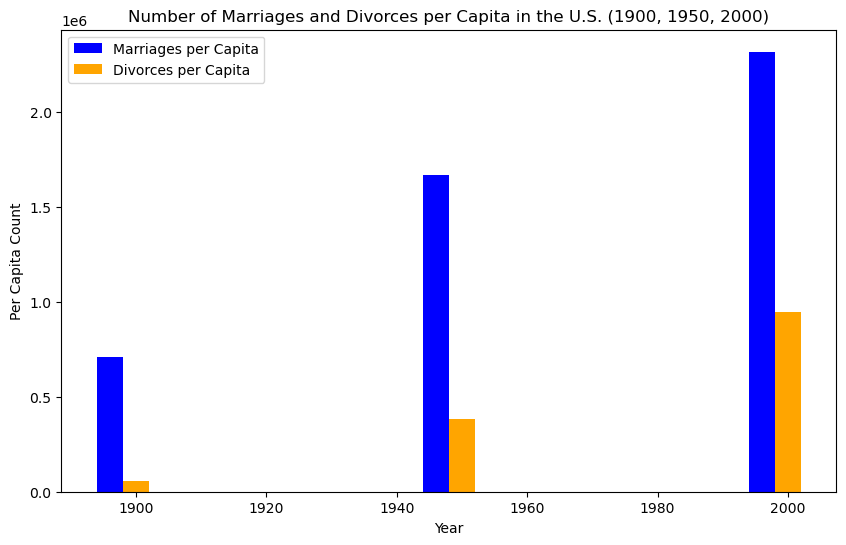

In [4]:
file_path = '../Datasets/us-marriages-divorces-1867-2014.csv'
df = pd.read_csv(file_path)

selected_years = [1900, 1950, 2000]
filtered_data = df[df['Year'].isin(selected_years)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Year'] - 4, filtered_data['Marriages'], width=4, label='Marriages per Capita', color='blue')
plt.bar(filtered_data['Year'], filtered_data['Divorces'], width=4, label='Divorces per Capita', color='orange')


plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

plt.legend()

plt.show()

# Question 8

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.Don't forget to label your axes!

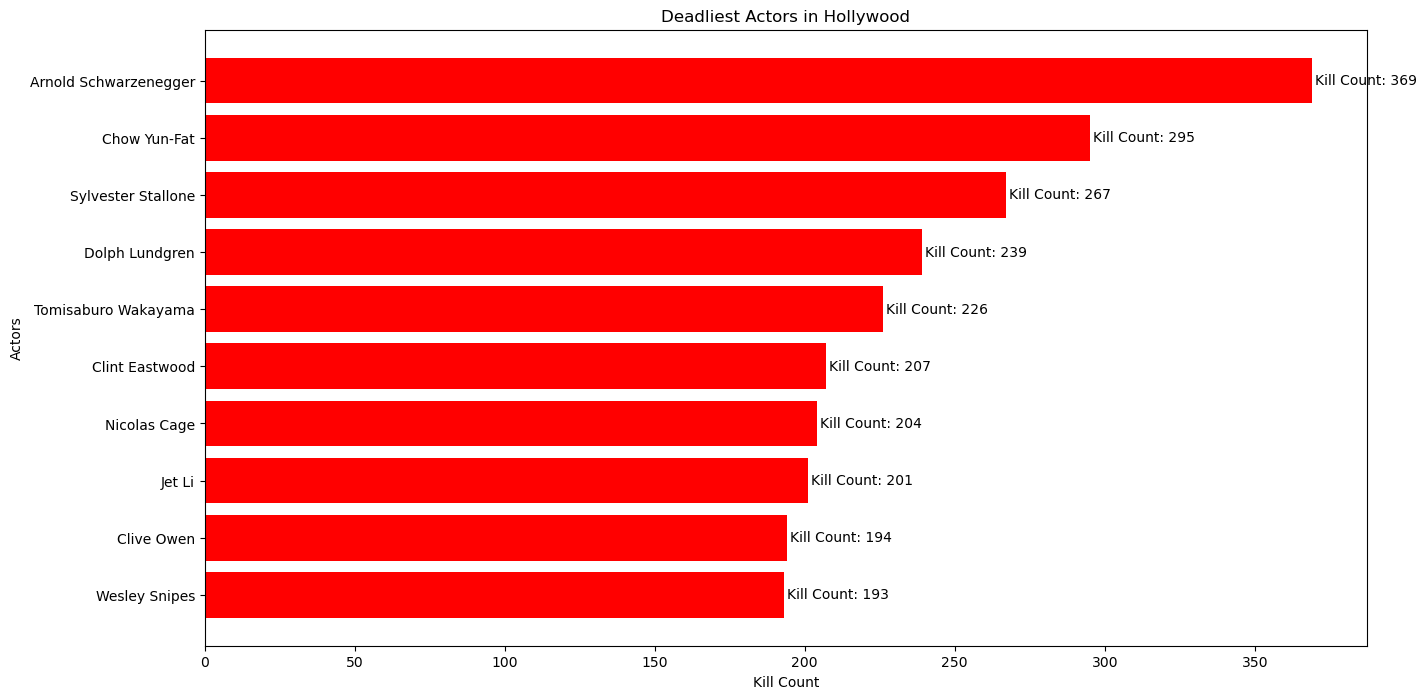

In [115]:
file_path = '../Datasets/actor_kill_counts.csv'

actors_df = pd.read_csv(file_path)

actors_df = actors_df.sort_values(by='Count',ascending=True)

plt.figure(figsize=(15,8))
plt.barh(actors_df['Actor'],actors_df['Count'],color='red')

for actor, kill_count in zip(actors_df['Actor'], actors_df['Count']):
    plt.text(kill_count + 1, actor, f'Kill Count: {kill_count}', va='center')



plt.xlabel('Kill Count')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood')
plt.show()

# Question 9 
#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows thepercentage breakdown of the categories.

In [117]:
file_path = '../Datasets/roman-emperor-reigns.csv'

romans_df = pd.read_csv(file_path)

romans_df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


(-1.099999913879916,
 1.0999998580849701,
 -1.0999787381349013,
 1.0999989875302334)

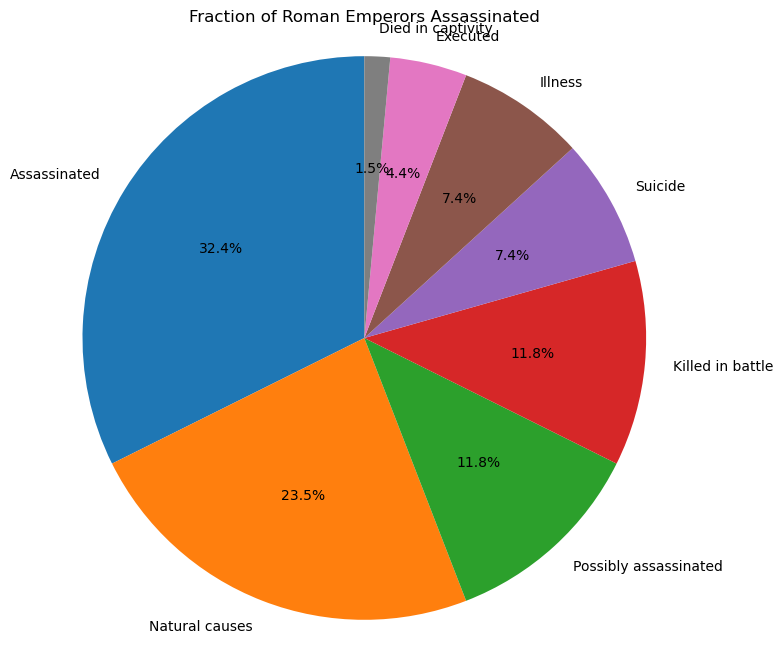

In [120]:
cause_of_death_counts = romans_df['Cause_of_Death'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(cause_of_death_counts, labels=cause_of_death_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal') 


# Question 10
#### Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between2000 and 2009.Don't forget to label your axes!Color each dot according to its year

In [121]:
file_path = '../Datasets/arcade-revenue-vs-cs-doctorates.csv'

scatter_df = pd.read_csv(file_path)

scatter_df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


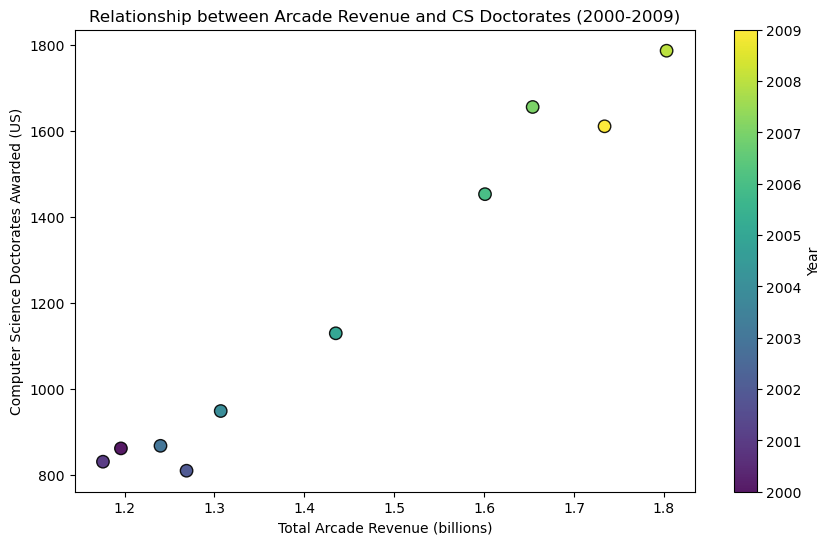

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Total Arcade Revenue (billions)'], scatter_df['Computer Science Doctorates Awarded (US)'], 
            c=scatter_df['Year'], cmap='viridis', edgecolors='k', s=80, alpha=0.9)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.colorbar(label='Year')

plt.show()